# Predicción de calificaciones usando Random Forest.

Problema supervisado. Cada observación corresponde a las variables asociadas a una compañía en una fecha particular. No se controla por fecha o industría.


### 1. Cargar librería requeridas

In [1]:
import pandas as pd
from rating_package.rating_prediction_functions import *

### 2. Cargar archivos requeridos

Para cargar los archivo de datos se debe tener en cuenta lo siguiente:

* Todas las variables del archivo `research_data` que se desean incorporar al proceso de entrenamiento deben estar creadas en el archivo `features.csv`, y la llave corresponde a la columna `Key`. 
* Deben existir dos columnas para identificar las observaciones: `[Fecha, Ticker]`.
* Debe existir variable `IssuerRating` que corresponde al output.
* En caso de crear nuevas variables en el archivo `features.csv`, se deben evitar comas, tildes y otros símbolos.

In [5]:
# Nombres de variables y llaves:
feat_key = pd.read_csv('data/features.csv', sep=',', index_col = ["Feature"], encoding = "latin1")
feat_key_pure = pd.read_csv('data/features_pure.csv', sep=',', index_col = ["Feature"], encoding = "latin1")

# Encoder para calificaciones:
le = pd.read_csv('data/lab_encoder.csv', sep=',', index_col = 0, encoding = "latin1")

# Datos de entrenamiento:
data_em = pd.read_csv('data/research_data_em.csv', sep=',', index_col = ["Fecha", 'Ticker'], encoding = "latin1")
data_dm = pd.read_csv('data/research_data_dm.csv', sep=',', index_col = ["Fecha", 'Ticker'], encoding = "latin1")


### 3. Proceso de entrenamiento.
#### 3.1. Parámetros

In [6]:
remove_nan = True # Remover filas con datos faltantes.
perc_train_size = 0.8 # Porcentaje de observaciones para entrenamiento.
model_file = 'model/rating_random_forest_em.sav' # Modelo.
model_file_pure = 'model/rating_random_forest_pure.sav' # Modelo.
sov_encoder_file = 'model/sov_lab_encoder_em.sav' # Encoder de rating soberano.
output_file = 'output/pred_test.csv' # Archivo de salida con prediciones.
output_file_pure = 'output/pred_test_pure.csv' # Archivo de salida con prediciones.


#### 3.2. Entrenar modelo e imprimir resultados sobre muestra de testing
Se publican los siguientes archivos: 

* El archivo en la ruta `output_file` contiene las observaciones usadas para testing, el rating real y el rating que predice el argoritmo.

#### 3.2.1. Entrenamiento de modelo con datos de emergentes con Riesgo Soberano.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Muestra de entrenamiento: 1485
Muestra de testing: 372

Score sobre muestra de testing:
0.85752688172


Ranking:
1. Rating Soberano País de Origen Deuda LP Moneda Extranjera (0.062868)
2. Ingresos del Trimestre Anualizados / Total Activo (Promedio LTM) (0.054958)
3. Ingresos del Trimestre Anualizados / Total Activo (0.048222)
4. EBITDA del Trimestre Anualizado / Intereses (Promedio LTM) (0.046334)
5. Margen EBITDA del Trimestre (Promedio LTM) (0.045341)
6. Activo Corto Plazo / Pasivo Corto Plazo (Promedio LTM) (0.043359)
7. Total Activo / Total Patrimonio (0.042241)
8. Deuda Neta / EBITDA del Trimestre Anualizado (Promedio LTM) (0.041730)
9. Deuda Bruta / Activo (Promedio LTM) (0.041409)
10. Total Activo / Total Patrimonio (Promedio LTM) (0.041376)
11. Deuda de Corto Plazo / Deuda Total (Promedio LTM) (0.040863)
12. Deuda Bruta / Activo (0.039655)
13. EBITDA del Trimestre Anualizado / Deuda Corto Plazo (Promedio LTM) (0.039607)
14. Margen Neto del Trimestre (Promedio LTM) (0.035305)
15

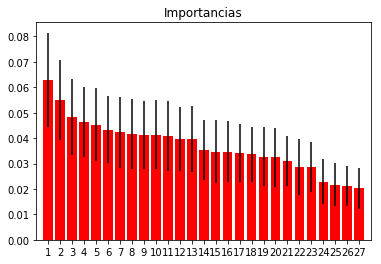

In [7]:
model_training(data_em, feat_key, le, remove_nan, perc_train_size, output_file, model_file, sov_encoder_file)

#### 3.2.2. Entrenamiento de modelo con datos de desarrollados sin Riesgo Soberano.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Muestra de entrenamiento: 4535
Muestra de testing: 1134

Score sobre muestra de testing:
0.836860670194


Ranking:
1. EBITDA del Trimestre Anualizado / Intereses (Promedio LTM) (0.058266)
2. Activo Corto Plazo / Pasivo Corto Plazo (Promedio LTM) (0.052766)
3. Margen EBITDA del Trimestre (Promedio LTM) (0.048572)
4. Ingresos del Trimestre Anualizados / Total Activo (Promedio LTM) (0.048375)
5. Deuda Bruta / Activo (Promedio LTM) (0.045658)
6. Deuda Neta / EBITDA del Trimestre Anualizado (Promedio LTM) (0.044317)
7. Activo Corto Plazo / Pasivo Corto Plazo (0.042931)
8. Total Activo / Total Patrimonio (Promedio LTM) (0.042742)
9. Deuda Bruta / Activo (0.042347)
10. Margen Neto del Trimestre (Promedio LTM) (0.041620)
11. Total Activo / Total Patrimonio (0.041034)
12. Ingresos del Trimestre Anualizados / Total Activo (0.040851)
13. Utilidad Operacional del Trimestre / Activo Total (Promedio LTM) (0.039862)
14. EBITDA del Trimestre Anualizado / Intereses (0.039544)
15. Deuda de Corto Plazo /

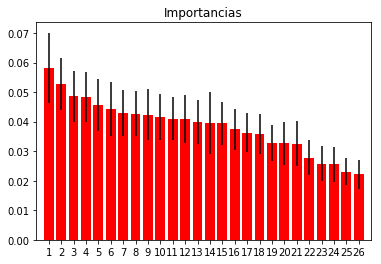

In [8]:
model_training(data_dm, feat_key_pure, le, remove_nan, perc_train_size, output_file_pure, model_file_pure, sov_encoder_file)